<a href="https://colab.research.google.com/github/Dishantkharkar/Dishantkharkar/blob/main/Parishousing_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement
Use relavant machine learning model to predict Price of House in paris using other individual values.

In [ ]:
#import basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [ ]:
data=pd.read_csv('parishousing.csv')

# Basic Checks

In [ ]:
data.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


# Domain Analysis
* Price of house is target
* Price is dependent on other individual variables like Numbers of room , squaremeters,yards,etc
* This data is basically tells us about price of the houses in paris which has facilities and price is depend on that facilities.

In [ ]:
data.shape # shape

(10000, 17)

In [ ]:
# print all the columns
data.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')

In [ ]:
# data types
data.dtypes

squareMeters           int64
numberOfRooms          int64
hasYard                int64
hasPool                int64
floors                 int64
cityCode               int64
cityPartRange          int64
numPrevOwners          int64
made                   int64
isNewBuilt             int64
hasStormProtector      int64
basement               int64
attic                  int64
garage                 int64
hasStorageRoom         int64
hasGuestRoom           int64
price                float64
dtype: object

In [ ]:
# type casting is used to convert one dataype to another dtype
data["price"]=data["price"].astype('int64')

In [ ]:
data.dtypes

squareMeters         int64
numberOfRooms        int64
hasYard              int64
hasPool              int64
floors               int64
cityCode             int64
cityPartRange        int64
numPrevOwners        int64
made                 int64
isNewBuilt           int64
hasStormProtector    int64
basement             int64
attic                int64
garage               int64
hasStorageRoom       int64
hasGuestRoom         int64
price                int64
dtype: object

In [ ]:
data.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052


In [ ]:
#info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   squareMeters       10000 non-null  int64
 1   numberOfRooms      10000 non-null  int64
 2   hasYard            10000 non-null  int64
 3   hasPool            10000 non-null  int64
 4   floors             10000 non-null  int64
 5   cityCode           10000 non-null  int64
 6   cityPartRange      10000 non-null  int64
 7   numPrevOwners      10000 non-null  int64
 8   made               10000 non-null  int64
 9   isNewBuilt         10000 non-null  int64
 10  hasStormProtector  10000 non-null  int64
 11  basement           10000 non-null  int64
 12  attic              10000 non-null  int64
 13  garage             10000 non-null  int64
 14  hasStorageRoom     10000 non-null  int64
 15  hasGuestRoom       10000 non-null  int64
 16  price              10000 non-null  int64
dtypes: int64(17)


In [ ]:
# Tail
data.tail()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107
9999,1440,84,0,0,49,18412,6,10,1994,1,0,8485,2024,278,1,6,146708


In [ ]:
# Describe
data.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993447e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031300e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


In [ ]:
data.drop('cityPartRange',axis=1,inplace=True)
data.drop('cityCode',axis=1,inplace=True)

In [ ]:
data.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,8,2005,0,1,4313,9005,956,0,7,7559081
1,80771,39,1,1,98,6,2015,1,0,3653,2436,128,1,2,8085989
2,55712,58,0,1,19,8,2021,0,0,2937,8852,135,1,9,5574642
3,32316,47,0,0,6,4,2012,0,1,659,7141,359,0,3,3232561
4,70429,19,1,1,90,7,1990,1,0,8435,2429,292,1,4,7055052


In [ ]:
# Check for missing values
data.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

# Explorartory Data Analysis
* Univariate Analysis
* Bivariate Analysis
* Multivariate Analysis

# Univarate Analysis
* Analysis single variable/columns/features
* check the distrubution of each column

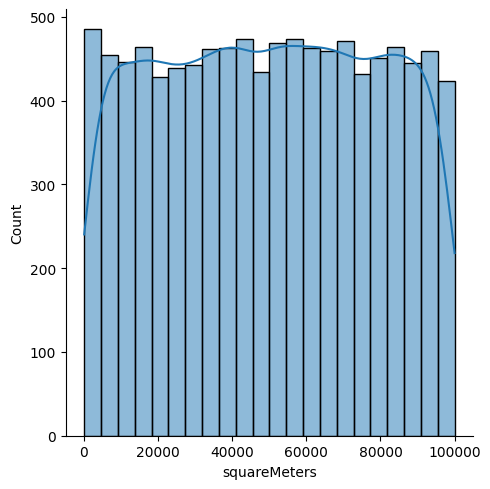

In [ ]:
# check distrubution of squaremeter
sns.displot(x=data.squareMeters,kde=True)

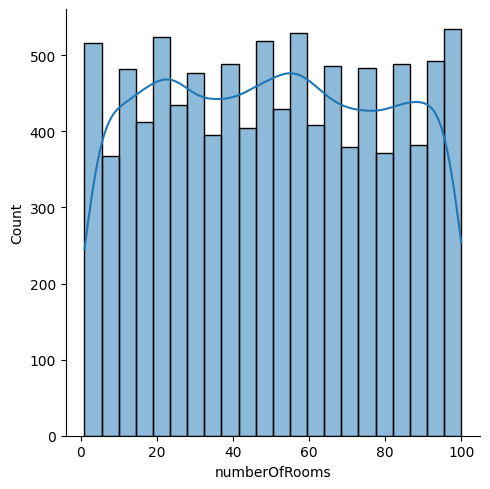

In [ ]:
# Check distribution for numberOfRooms
sns.displot(x=data.numberOfRooms,kde=True)

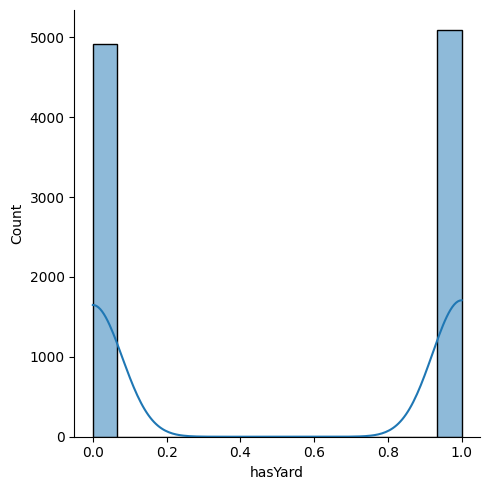

In [ ]:
# Check distribution for hasYard
sns.displot(x=data.hasYard,kde=True)

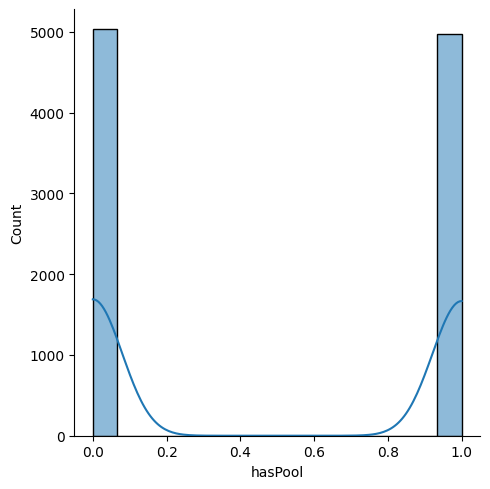

In [ ]:
# Check distribution for hasPool
sns.displot(x=data.hasPool,kde=True)

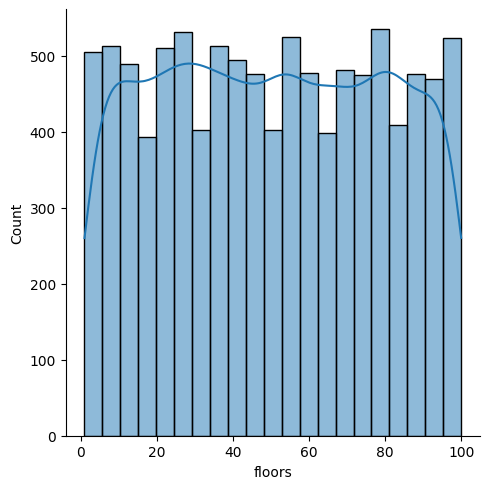

In [ ]:
# Check distribution for floors
sns.displot(x=data.floors,kde=True)

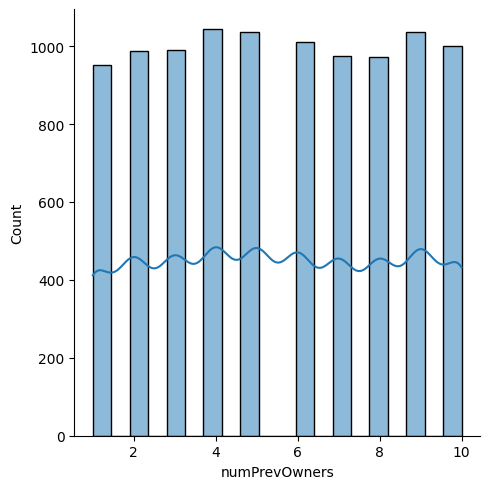

In [ ]:
# Check distrubution for numPrevOwners	
sns.displot(data.numPrevOwners,kde=True	)

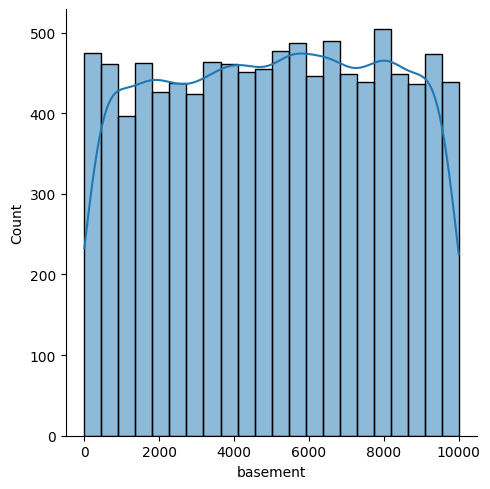

In [ ]:
# Check distribution for basement
sns.displot(data.basement,kde=True)

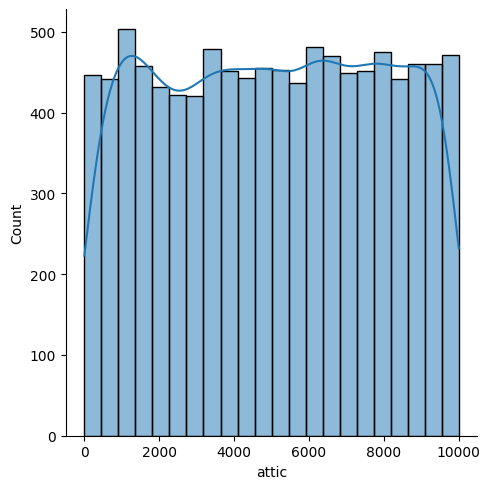

In [ ]:
# check distribution for attic
sns.displot(data.attic,kde=True)

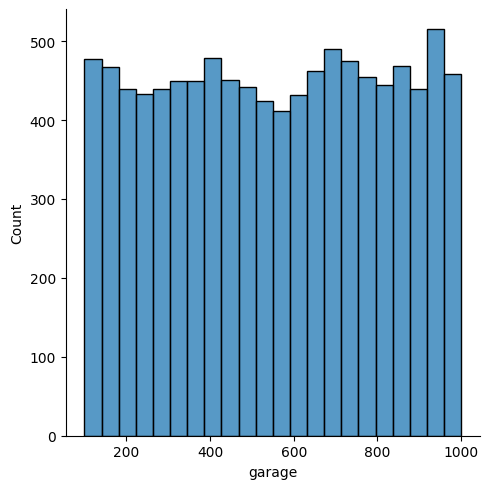

In [ ]:
# Check distribution for garage
sns.displot(data.garage)

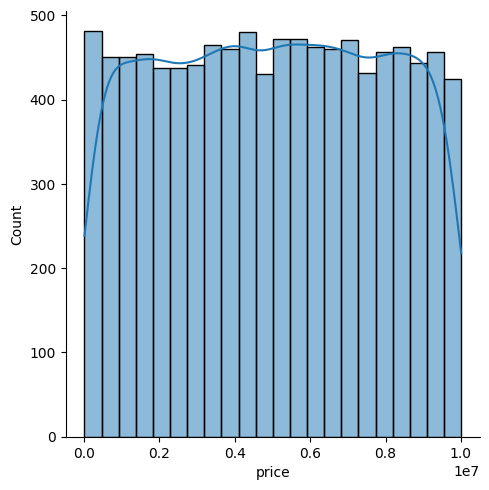

In [ ]:
# check distribution for price
sns.displot(x=data.price,kde=True)

# Insights
* Price is dependent on all the factor associate with house.
* Price shows Symmetric Distribution

# Bivariate Analysis
Analysis of two Variable

<Axes: xlabel='squareMeters', ylabel='price'>

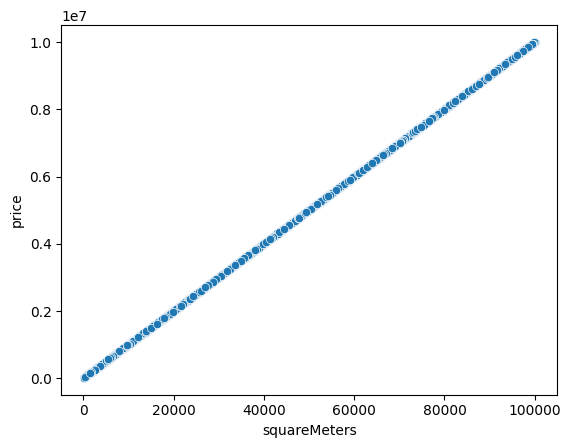

In [ ]:
# Analyse How squareMeters varies with Price
sns.scatterplot(data=data,x='squareMeters',y='price')


# Insights
* there is directly proportional relationship between squreMeters to price.
* If squareMeter is increses price will be increses

<Axes: xlabel='numberOfRooms', ylabel='price'>

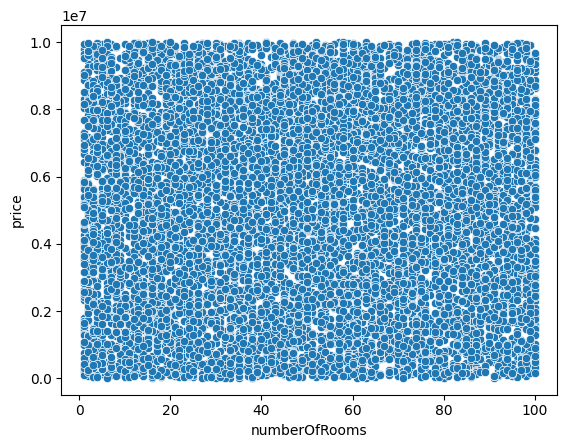

In [ ]:
# Analyse How numberOfRooms with price
sns.scatterplot(data=data,x='numberOfRooms',y='price')

# Insight
* There is no direct realtion between numberofrooms with price of house

<Axes: xlabel='made', ylabel='price'>

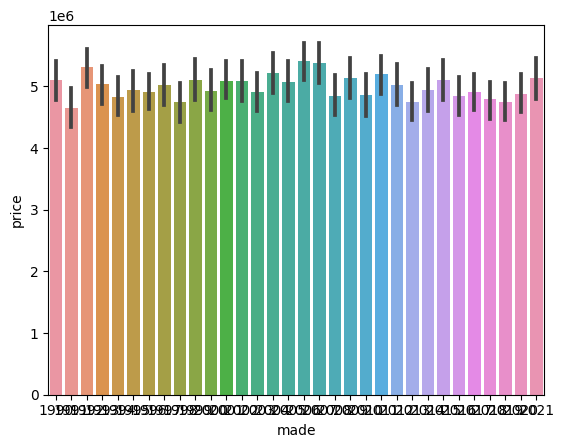

In [ ]:
# Analyse How hasyard with price
sns.barplot(data=data,x='made',y='price')

# Data Preprocessing





In [ ]:
# Check missing values and handle them
data.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

# Check For Duplicates

In [ ]:
data.duplicated().sum()

0

# Check for Outliers

<Axes: xlabel='squareMeters'>

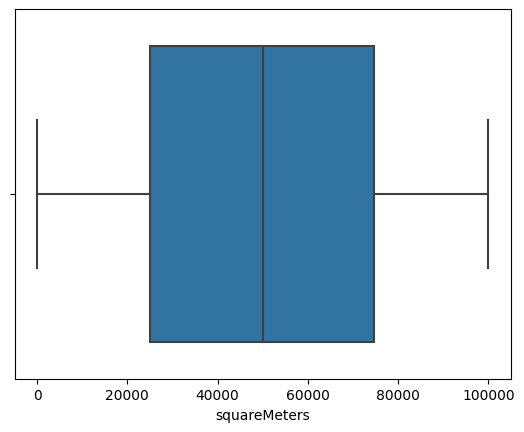

In [ ]:
# Check outliers in squareMeters
sns.boxplot(x=data.squareMeters)

<Axes: xlabel='numberOfRooms'>

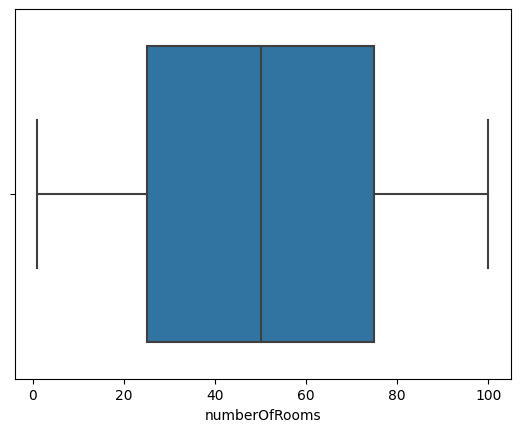

In [ ]:
# for numberOfRooms
sns.boxplot(x=data.numberOfRooms)

<Axes: >

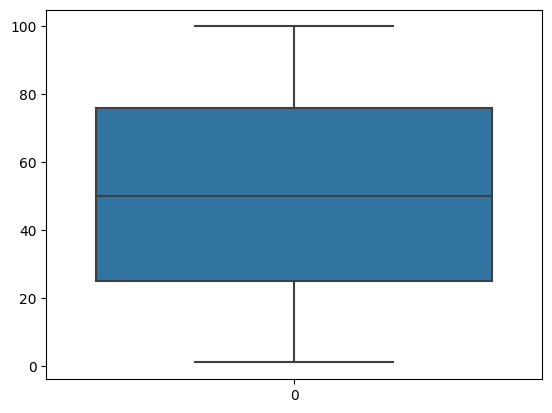

In [ ]:
# for floors
sns.boxplot(data.floors)

<Axes: >

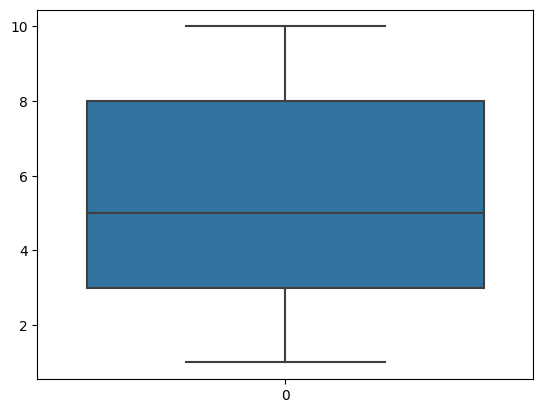

In [ ]:
# for numPrevowners
sns.boxplot(data.numPrevOwners)

<Axes: >

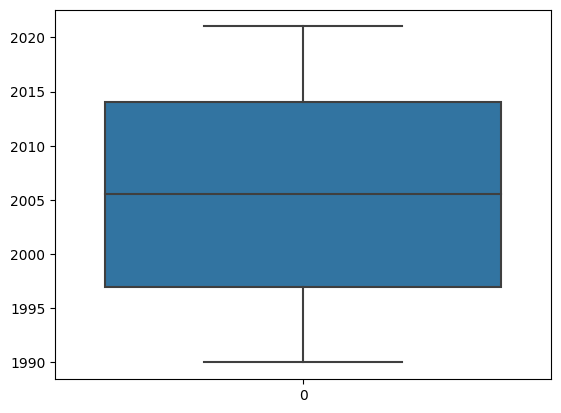

In [ ]:
# for made
sns.boxplot(data.made)

<Axes: >

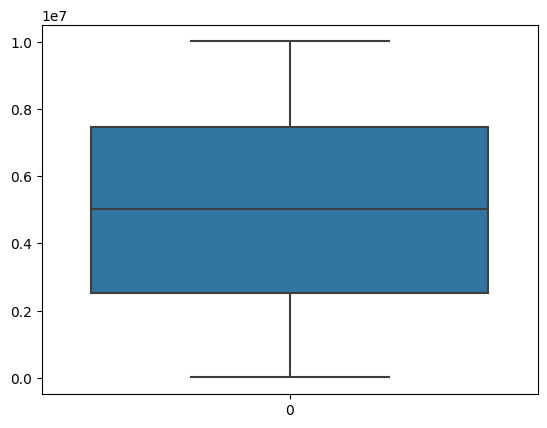

In [ ]:
sns.boxplot(data.price)

<Axes: >

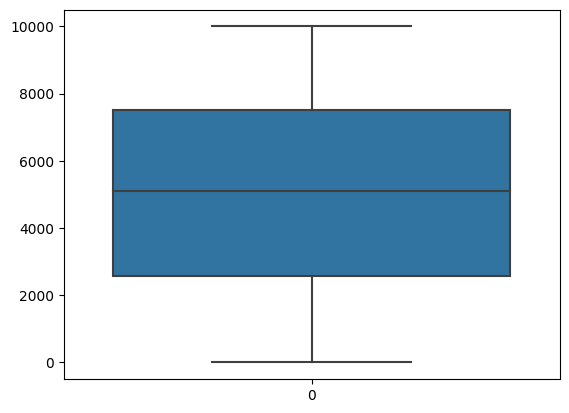

In [ ]:
sns.boxplot(data.basement)

# Insights
the given data is numerical data has no outliers in any of the features and no null value.

# Spilt Data into X and y

In [ ]:
x=data.drop('price',axis=1)
y=data['price']

## Spilt data for training and testing

# **Sklearn**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=4)

In [ ]:
x_train.shape

(7000, 14)

In [ ]:
x_test.shape

(3000, 14)

# **Model Building**

In [ ]:
# import Linaer Regression Model
from sklearn.linear_model import LinearRegression
# initialise Model
model=LinearRegression()
# train model with x_train and y_train
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
# make prediaction - test model
y_pred=model.predict(x_test)
y_pred

array([4225177.37577047, 6571345.2705109 , 8388477.11421633, ...,
       1170579.4121222 , 1571130.96104156, 2103110.20883213])

In [ ]:
y_test

1603    4224392
8713    6573646
4561    8390712
6600    5014491
2558    1189428
         ...   
3458    2144809
682     4352882
3128    1170585
8271    1573398
1031    2100765
Name: price, Length: 3000, dtype: int64

In [ ]:
# Slopes/coefficent of x
model.coef_

array([ 9.99995642e+01,  3.09468425e-01,  3.03814848e+03,  2.98875696e+03,
        5.45459260e+01,  4.58238932e+00, -1.61592630e+00,  1.29928637e+02,
        1.47991225e+02, -3.23886320e-03,  2.03598920e-03,  1.82806451e-01,
        6.13196863e+01, -4.05635359e+00])

In [ ]:
# Intercept
model.intercept_

3644.404912128113

In [ ]:
# How to MAke prediaction

In [ ]:
model.predict([[34543,5,1,3,4,5,2016,1,1,1,234,1,1,12]])

array([3467209.92655491])

# Evaluate The Model


In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
# MSE
MSE = mean_squared_error(y_test,y_pred)
MSE

3539020.7983408463

In [ ]:
# MAE
MAE=mean_absolute_error(y_test,y_pred)
MAE

1465.4452034647363

In [ ]:
# RMSE
RMSE=np.sqrt(MSE)
RMSE

1881.2285343202846

In [ ]:
# R2_score
r2_score(y_test,y_pred)

0.9999995662683282

* **99% better model to make prediction**
* **Model has learnt 99% of the information**

## Adjusted R2 score

In [ ]:
adj_r2=1-(1-0.99)*(3000-1)/(3000-14-1)
adj_r2

0.9899530988274706

In [ ]:
y_test.shape

(3000,)

# Clearly adjusted r2 score < r2 score
# So its **Good Model**